In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
dt = pd.read_csv("twitter_training.csv")

In [4]:
dt.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
# Naming the columns
dt.columns = ['TweetID', 'Entity', 'Sentiment', 'Content']

In [6]:
dt.head(3)

,TweetID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...


In [7]:
dt.shape

(74681, 4)

In [8]:
# Checking the null values
dt.isnull().sum()

TweetID        0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [9]:
# Dropping the null values
dt = dt.dropna(axis=0)

In [10]:
dt.isnull().sum()

TweetID      0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [11]:
# Checking the duplicate values
dt.duplicated().sum()

2340

In [12]:
# Dropping the duplicate values
dt = dt.drop_duplicates()

In [13]:
dt.shape

(71655, 4)

In [14]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71655 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetID    71655 non-null  int64 
 1   Entity     71655 non-null  object
 2   Sentiment  71655 non-null  object
 3   Content    71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [15]:
# Value counts of Entities
dt['Entity'].value_counts()

TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2205
Xbox(Xseries)                        2201
Google                            

In [16]:
# Value counts of Sentiments
dt['Sentiment'].value_counts()

Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: Sentiment, dtype: int64

In [17]:
# Replacing the Irrelevant sentiments into Neutral
dt['Sentiment']= dt['Sentiment'].replace('Irrelevant','Neutral')
dt['Sentiment'].value_counts()

Neutral     30245
Negative    21698
Positive    19712
Name: Sentiment, dtype: int64

In [18]:
dt['Content'][22]

'that was the first borderlands session in a hot row where i actually had a really bad combat experience. i did some really good kills'

# EDA and Data Visualization

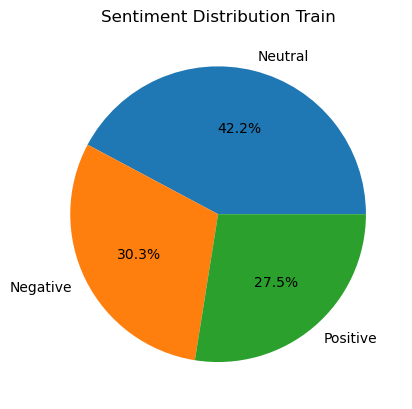

In [19]:
# Sentiments visualization using Pie chart
sentiment_counts = dt['Sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution Train')
plt.show()

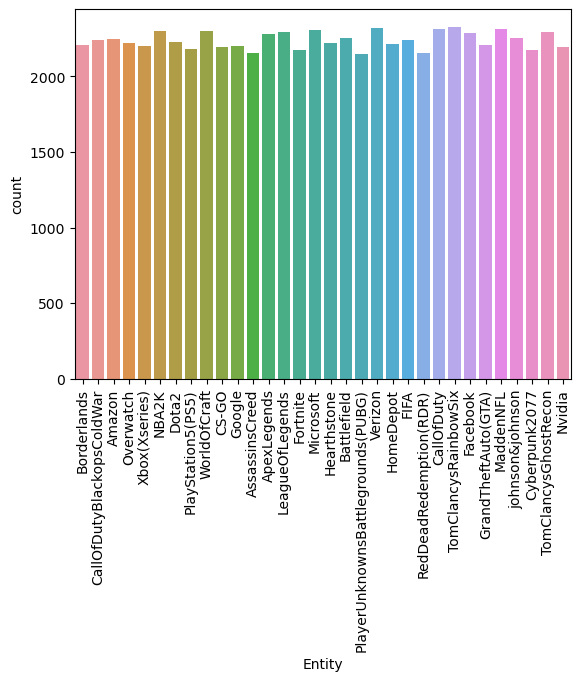

In [20]:
# Count distribution of Entities
sns.countplot(x="Entity",data=dt) 
plt.xticks(rotation='vertical')
plt.show()

In [21]:
# Installing wordcloud library
! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [22]:
# Cloning the original data for further operations
train_data = dt.copy()

In [23]:
train_data.head()

,TweetID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [24]:
# Validation data 
a = pd.read_csv("twitter_validation.csv", header=None)

In [25]:
a.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [26]:
# Naming the columns
a.columns = ['id','information','type','text']

In [27]:
a.head(3)

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...


In [28]:
a.shape

(1000, 4)

In [29]:
# Checking the null values
a.isnull().sum()

id             0
information    0
type           0
text           0
dtype: int64

In [30]:
a.duplicated().sum()

0

In [31]:
val_data = a.copy()

In [32]:
val_data.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [33]:
# Replacing the Irrelevant sentiments into Neutral
val_data['type']= val_data['type'].replace('Irrelevant','Neutral')
val_data['type'].value_counts()

Neutral     457
Positive    277
Negative    266
Name: type, dtype: int64

In [34]:
# Checking the value counts of information feature
val_data['information'].value_counts()

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


In [35]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [36]:
# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gnara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gnara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and links
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
   
    # Tokenization and removing stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [38]:
# Apply the preprocess_text function to the 'text' column
train_data['preprocessed_text'] = train_data['Content'].apply(preprocess_text)
train_data

,TweetID,Entity,Sentiment,Content,preprocessed_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder
...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized windows partition mac like years behi...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition years behind nvi...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac years behind nv...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,realized windows partition mac like years behi...


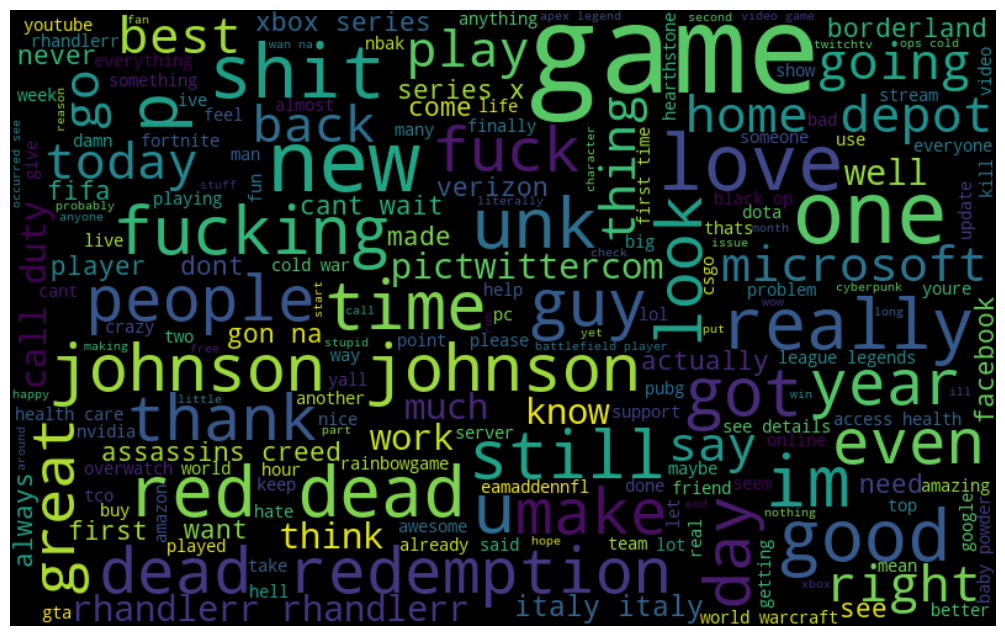

In [39]:
# Frequent words visualization
all_words = " ".join([sentence for sentence in train_data['preprocessed_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
# Apply the preprocess_text function to the 'text' column
val_data['preprocessed_text'] = val_data['text'].apply(preprocess_text)
val_data

,id,information,type,text,preprocessed_text
0,3364,Facebook,Neutral,I mentioned on Facebook that I was struggling ...,mentioned facebook struggling motivation go ru...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...
...,...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Neutral,⭐️ Toronto is the arts and culture capital of ...,toronto arts culture capital canada wonder wan...
996,4359,CS-GO,Neutral,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewers one peopl...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small wins


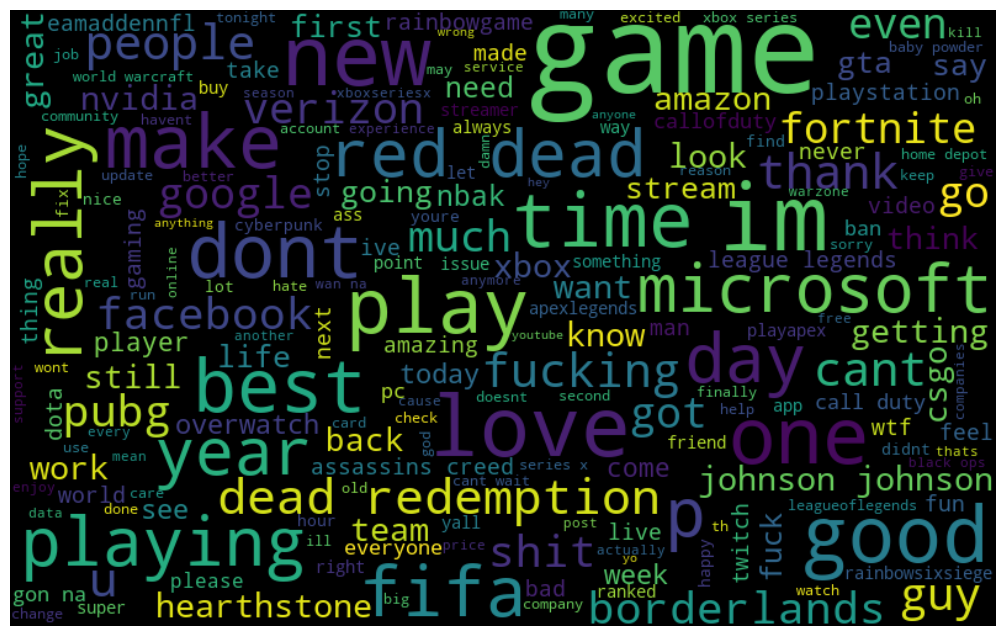

In [41]:
# Frequent words visualization
all_words = " ".join([sentence for sentence in val_data['preprocessed_text']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Model Building and Evaluation

In [42]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the 'max_features' parameter based on your dataset

# Fit and transform the training data
tfidf_train_features = tfidf_vectorizer.fit_transform(train_data['preprocessed_text'])

# Transform the validation data using the same vectorizer
tfidf_validation_features = tfidf_vectorizer.transform(val_data['preprocessed_text'])

# Display the shape of the TF-IDF features
print(f"TF-IDF Training Features Shape: {tfidf_train_features.shape}")
print(f"TF-IDF Validation Features Shape: {tfidf_validation_features.shape}")

TF-IDF Training Features Shape: (71655, 5000)
TF-IDF Validation Features Shape: (1000, 5000)


In [43]:
# Initialize the LabelEncoder

label_encoder = LabelEncoder()

# Encode the class labels in both training and validation datasets
train_labels_encoded = label_encoder.fit_transform(train_data['Sentiment'])
validation_labels_encoded = label_encoder.transform(val_data['type'])

In [44]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier on the TF-IDF training features and encoded labels
xgb_classifier.fit(tfidf_train_features, train_labels_encoded)

# Predict the encoded labels for the TF-IDF validation features
validation_predictions_xgb_encoded = xgb_classifier.predict(tfidf_validation_features)

# Decode the predicted labels back to the original class labels
validation_predictions_xgb = label_encoder.inverse_transform(validation_predictions_xgb_encoded)

In [45]:
# Evaluate the performance of the XGBoost classifier
accuracy_xgb = accuracy_score(val_data['type'], validation_predictions_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

XGBoost Accuracy: 0.75


In [46]:
# Display additional classification metrics for XGBoost
print("XGBoost Classification Report:")
print(classification_report(val_data['type'], validation_predictions_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.71      0.75       266
     Neutral       0.71      0.87      0.78       457
    Positive       0.83      0.61      0.71       277

    accuracy                           0.75      1000
   macro avg       0.78      0.73      0.74      1000
weighted avg       0.77      0.75      0.75      1000



In [47]:
# Display the confusion matrix for XGBoost
print("XGBoost Confusion Matrix:")
print(confusion_matrix(val_data['type'], validation_predictions_xgb))

XGBoost Confusion Matrix:
[[188  71   7]
 [ 34 396  27]
 [ 16  91 170]]


In [48]:
# Assuming you have defined the preprocess_text function

# Example user input
user_input = "Platinum is the best loot @Borderlands"

# Preprocess the user input
user_input_processed = preprocess_text(user_input)

# Vectorize the user input using TF-IDF
user_input_tfidf = tfidf_vectorizer.transform([user_input_processed])

# Predict the sentiment type using the trained XGBoost model
prediction_encoded = xgb_classifier.predict(user_input_tfidf)[0]

# Decode the predicted label back to the original class label
predicted_type = label_encoder.inverse_transform([prediction_encoded])[0]

print(f"The predicted type for the input text is: {predicted_type}")

The predicted type for the input text is: Positive


In [49]:
# Example user input
user_input = "This is shitty. I get that profit-wise it was less business expected prior to a huge problem."

# Preprocess the user input
user_input_processed = preprocess_text(user_input)

# Vectorize the user input using TF-IDF
user_input_tfidf = tfidf_vectorizer.transform([user_input_processed])

# Predict the sentiment type using the trained XGBoost model
prediction_encoded = xgb_classifier.predict(user_input_tfidf)[0]

# Decode the predicted label back to the original class label
predicted_type = label_encoder.inverse_transform([prediction_encoded])[0]

print(f"The predicted type for the input text is: {predicted_type}")

The predicted type for the input text is: Negative


In [50]:
# Example user input
user_input = "Hello all, my name is Rolex."

# Preprocess the user input
user_input_processed = preprocess_text(user_input)

# Vectorize the user input using TF-IDF
user_input_tfidf = tfidf_vectorizer.transform([user_input_processed])

# Predict the sentiment type using the trained XGBoost model
prediction_encoded = xgb_classifier.predict(user_input_tfidf)[0]

# Decode the predicted label back to the original class label
predicted_type = label_encoder.inverse_transform([prediction_encoded])[0]

print(f"The predicted type for the input text is: {predicted_type}")

The predicted type for the input text is: Neutral
